In [2]:
import numpy as np
from RadarDevKit import RadarModule
from RadarDevKit.ConfigClasses import SysParams
from config import RunParams, get_radar_module, get_radar_params, get_run_params

radar_module = get_radar_module()
run_params= get_run_params()
radar_params = get_radar_params()
num_time_steps = 250

Connect
Connection to 10.0.0.59:1024 failed: [Errno 111] Connection refused
Connection to 10.0.0.59:1024 failed.
Number of the connected Radar Module:  0
Frequency [MHz]:  24000
Bandwidth [MHz]:  600
Ramp-time [ms]:  7
Number Points:  512
Bin Size (Resolution) [m]:  0.0

Connected to the radar.


In [2]:
# from collect_data import get_range_bins
# from get_all_sensor_data import get_FD_data

# test = []
# range_axis = get_range_bins(radar_module)

# for i in range(num_time_steps):
#     radar_module.GetFdData(run_params.ramp_type)
#     values = get_FD_data(radarModule=radar_module, radarParams=radar_params)
#     print(values.shape)
#     test.append(values)

In [3]:
# import matplotlib.pyplot as plt

# # Assuming `test` is already populated with your data
# # Create a single figure for all subplots
# plt.figure(figsize=(12, 10))  # Adjust the figure size to accommodate all subplots

# # Iterate over the first three arrays
# for i, data in enumerate(test):
#     if (i > 2):
#         continue
#     ax = plt.subplot(3, 1, i + 1)  # Create a subplot for each array
#     for ch in range(4):
#         ax.plot(range_axis, data[ch], label=f'Channel {ch+1}')  # Plot each channel's data on the current subplot
    
#     ax.set_title(f'Plot {i+1} - Frequency Domain Data Plot')
#     ax.set_xlabel('Sample Index')
#     ax.set_ylabel('Frequency')
#     ax.legend()
#     ax.grid(True)

# # Adjust layout to prevent overlap
# plt.tight_layout()
# plt.show()

### Try it again, with my FDDataMatrix type to make sure calculates look good

In [4]:

from collect_data import get_range_bins
from get_all_sensor_data import get_fd_data_from_radar

data_fd = []
phase_data = []
degrees = []
phase_diff = []
range_axis = get_range_bins(radar_module)

for i in range(num_time_steps):
    data_ret = get_fd_data_from_radar(run_params, radar_module, radar_params).fd_data
    selected_columns = data_ret[:, :4]
    columns_T = selected_columns.T
    print(columns_T.shape)
    phase_data.append(data_ret[:, 4:6].T)
    phase_diff.append(data_ret[:, -2:-1].T)
    degrees.append(data_ret[:, -1:].T)
    data_fd.append(columns_T)
    

(4, 512)
(4, 512)
(4, 512)
(4, 512)
(4, 512)
(4, 512)
(4, 512)
(4, 512)
(4, 512)
(4, 512)
(4, 512)
(4, 512)
(4, 512)
(4, 512)
(4, 512)
(4, 512)
(4, 512)
(4, 512)
(4, 512)
(4, 512)
(4, 512)
(4, 512)
(4, 512)
(4, 512)
(4, 512)
(4, 512)
(4, 512)
(4, 512)
(4, 512)
(4, 512)
(4, 512)
(4, 512)
(4, 512)
(4, 512)
(4, 512)
(4, 512)
(4, 512)
(4, 512)
(4, 512)
(4, 512)
(4, 512)
(4, 512)
(4, 512)
(4, 512)
(4, 512)
(4, 512)
(4, 512)
(4, 512)
(4, 512)
(4, 512)
(4, 512)
(4, 512)
(4, 512)
(4, 512)
(4, 512)
(4, 512)
(4, 512)
(4, 512)
(4, 512)
(4, 512)
(4, 512)
(4, 512)
(4, 512)
(4, 512)
(4, 512)
(4, 512)
(4, 512)
(4, 512)
(4, 512)
(4, 512)
(4, 512)
(4, 512)
(4, 512)
(4, 512)
(4, 512)
(4, 512)
(4, 512)
(4, 512)
(4, 512)
(4, 512)
(4, 512)
(4, 512)
(4, 512)
(4, 512)
(4, 512)
(4, 512)
(4, 512)
(4, 512)
(4, 512)
(4, 512)
(4, 512)
(4, 512)
(4, 512)
(4, 512)
(4, 512)
(4, 512)
(4, 512)
(4, 512)
(4, 512)
(4, 512)
(4, 512)
(4, 512)
(4, 512)
(4, 512)
(4, 512)
(4, 512)
(4, 512)
(4, 512)
(4, 512)
(4, 512)
(4, 512)
(

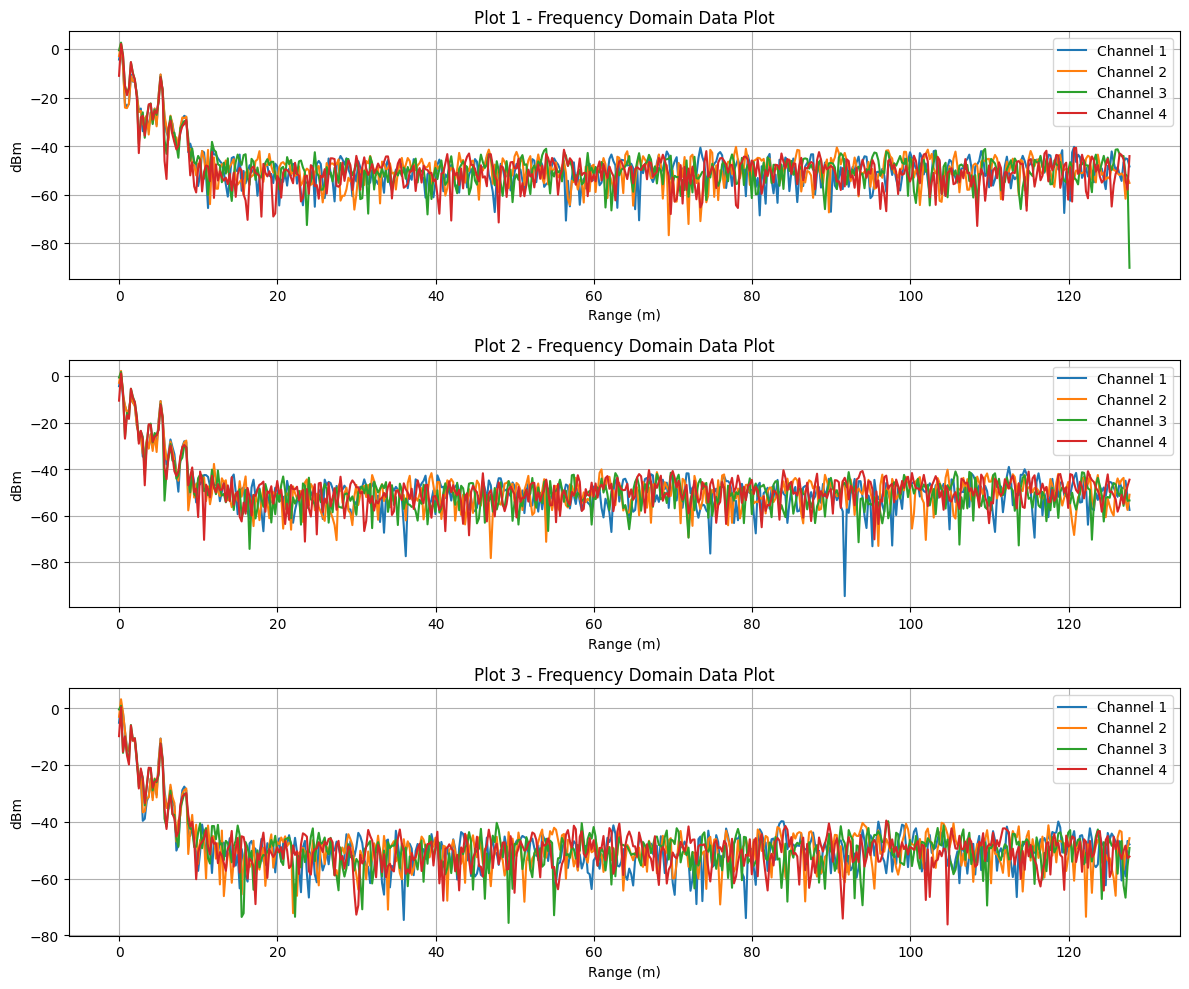

In [5]:
import matplotlib.pyplot as plt

# Assuming `test` is already populated with your data
# Create a single figure for all subplots
plt.figure(figsize=(12, 10))  # Adjust the figure size to accommodate all subplots

# Iterate over the first three arrays
for i, data in enumerate(data_fd):
    if (i > 2):
        continue
    ax = plt.subplot(3, 1, i + 1)  # Create a subplot for each array
    for ch in range(4):
        ax.plot(range_axis, data[ch, :], label=f'Channel {ch+1}')  # Ensure correct indexing

    ax.set_title(f'Plot {i+1} - Frequency Domain Data Plot')
    ax.set_xlabel('Range (m)')
    ax.set_ylabel('dBm')
    ax.legend()
    ax.grid(True)

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()

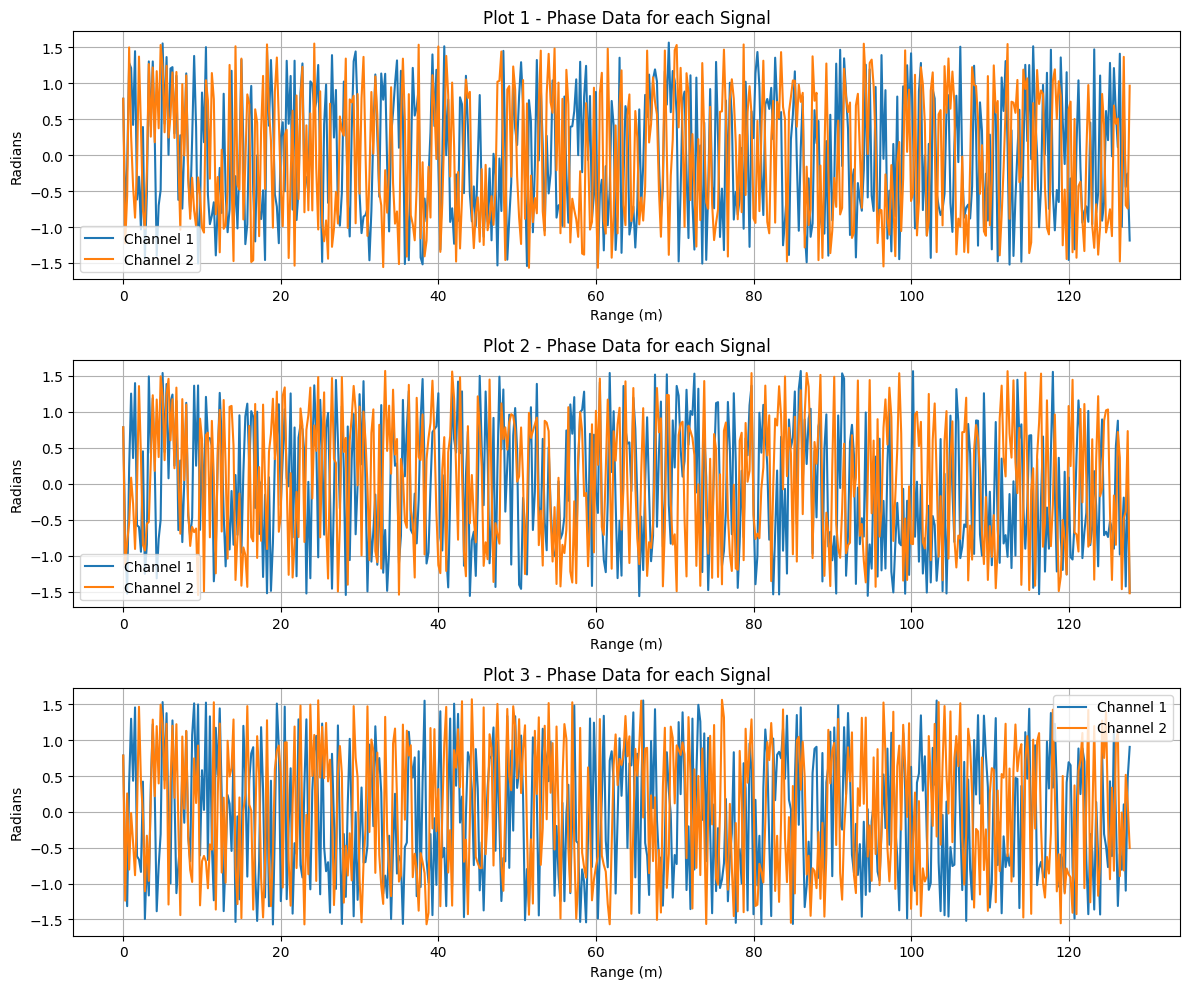

In [6]:
import matplotlib.pyplot as plt

# Assuming `test` is already populated with your data
# Create a single figure for all subplots
plt.figure(figsize=(12, 10))  # Adjust the figure size to accommodate all subplots

for i, data in enumerate(phase_data):
    if (i > 2):
        continue
    ax = plt.subplot(3, 1, i + 1)  # Create a subplot for each array
    for ch in range(2):
        ax.plot(range_axis, data[ch, :], label=f'Channel {ch+1}')  # Ensure correct indexing

    ax.set_title(f'Plot {i+1} - Phase Data for each Signal')
    ax.set_xlabel('Range (m)')
    ax.set_ylabel('Radians')
    ax.legend()
    ax.grid(True)
    
# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()

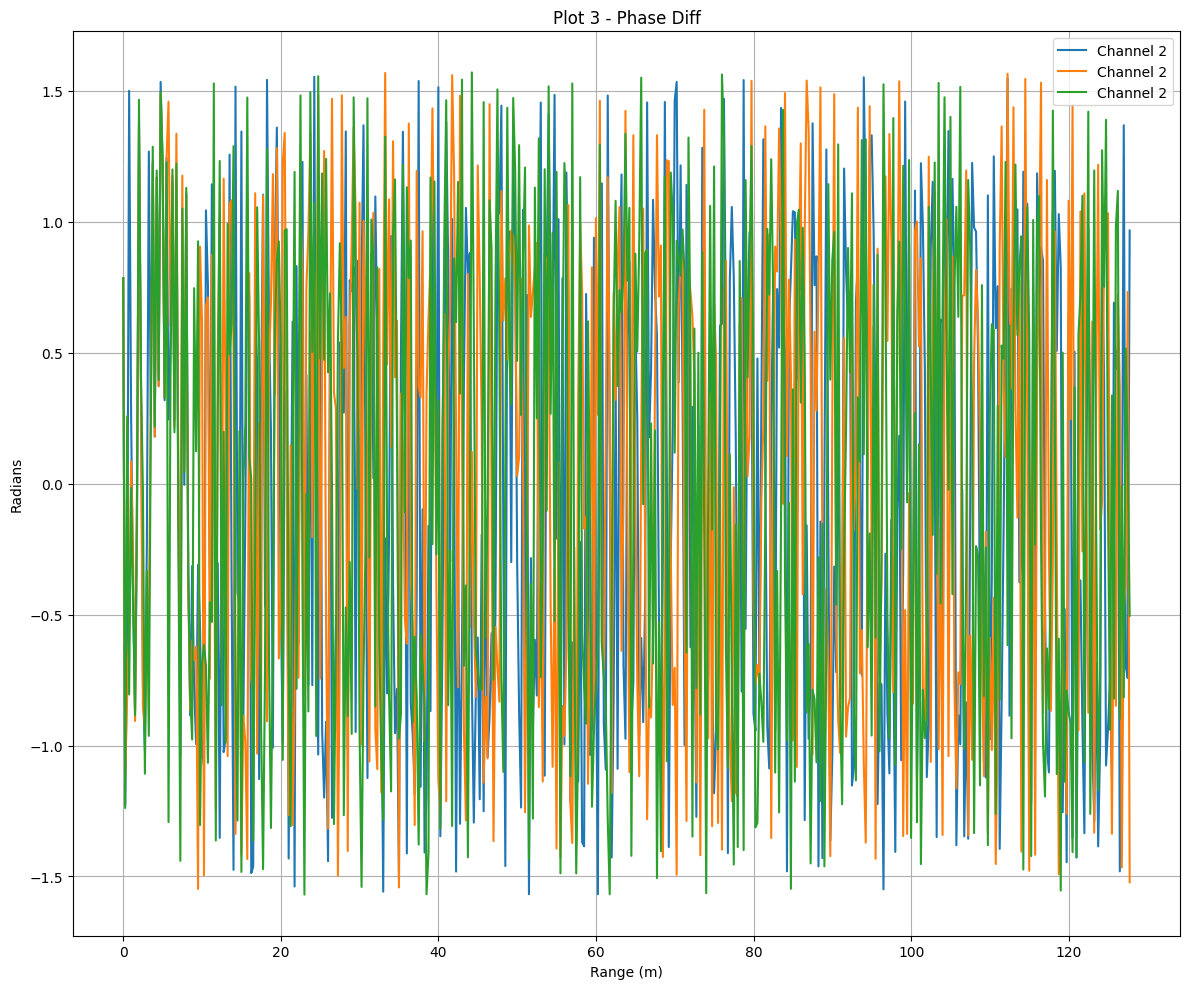

In [7]:
# Assuming `test` is already populated with your data
# Create a single figure for all subplots
plt.figure(figsize=(12, 10))  # Adjust the figure size to accommodate all subplots

for i, data in enumerate(phase_data):
    if (i > 2):
        continue

    plt.plot(range_axis, data[ch], label=f'Channel {ch+1}')  # Ensure correct indexing

    plt.title(f'Plot {i+1} - Phase Diff')
    plt.xlabel('Range (m)')
    plt.ylabel('Radians')
    plt.legend()
    plt.grid(True)
    
# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()

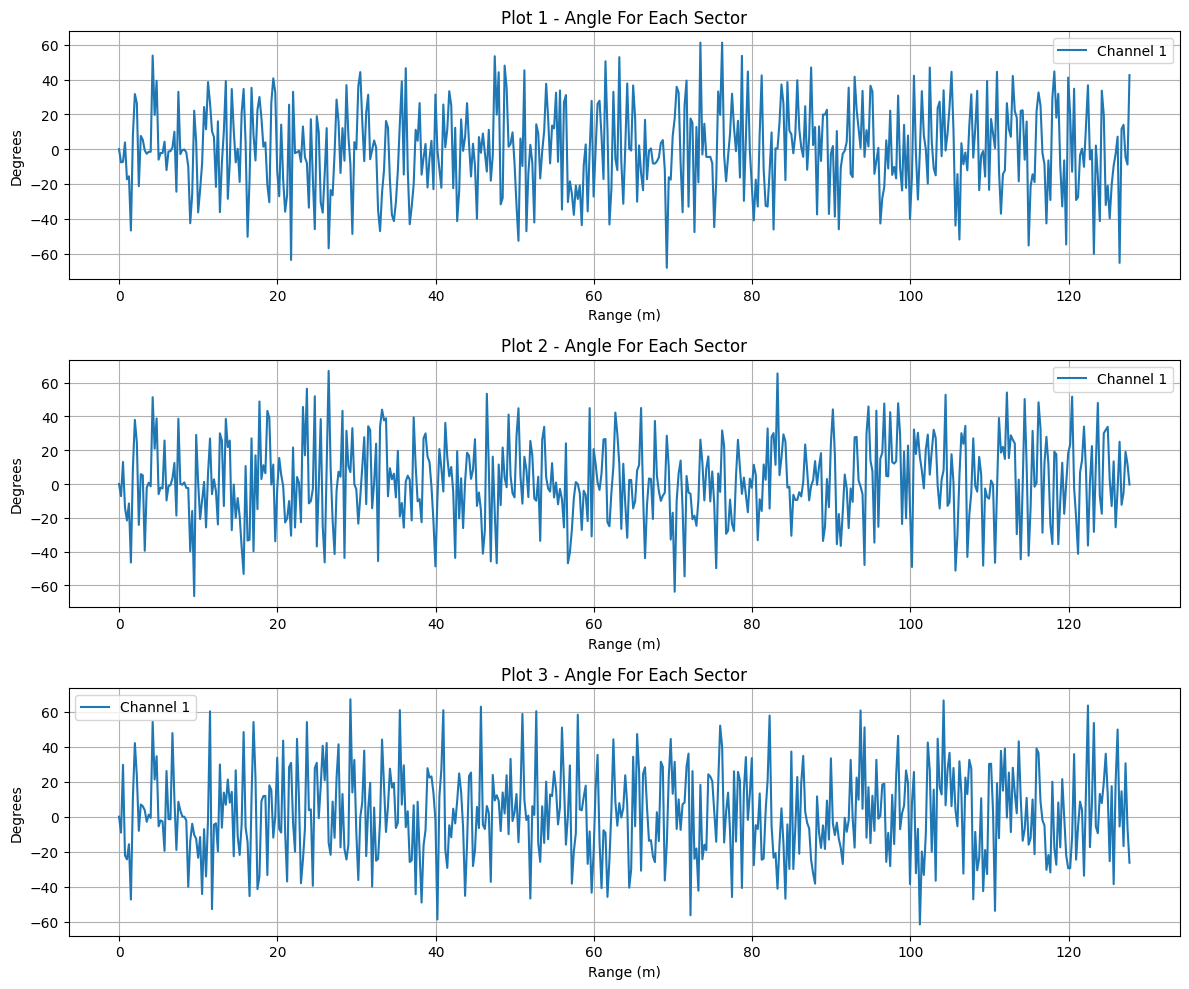

In [8]:
import matplotlib.pyplot as plt

# Assuming `test` is already populated with your data
# Create a single figure for all subplots
plt.figure(figsize=(12, 10))  # Adjust the figure size to accommodate all subplots

for i, data in enumerate(degrees):
    if (i > 2):
        continue
    ax = plt.subplot(3, 1, i + 1)  # Create a subplot for each array
    for ch in range(1):
        ax.plot(range_axis, data[ch, :], label=f'Channel {ch+1}')  # Ensure correct indexing

    ax.set_title(f'Plot {i+1} - Angle For Each Sector')
    ax.set_xlabel('Range (m)')
    ax.set_ylabel('Degrees')
    ax.legend()
    ax.grid(True)
    
# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()

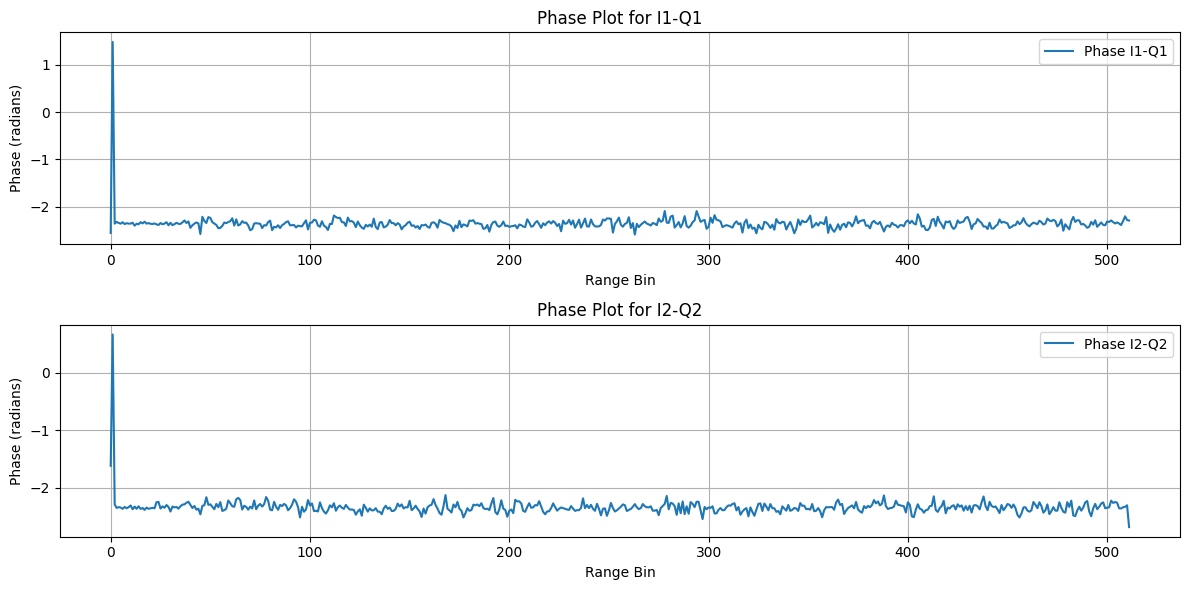

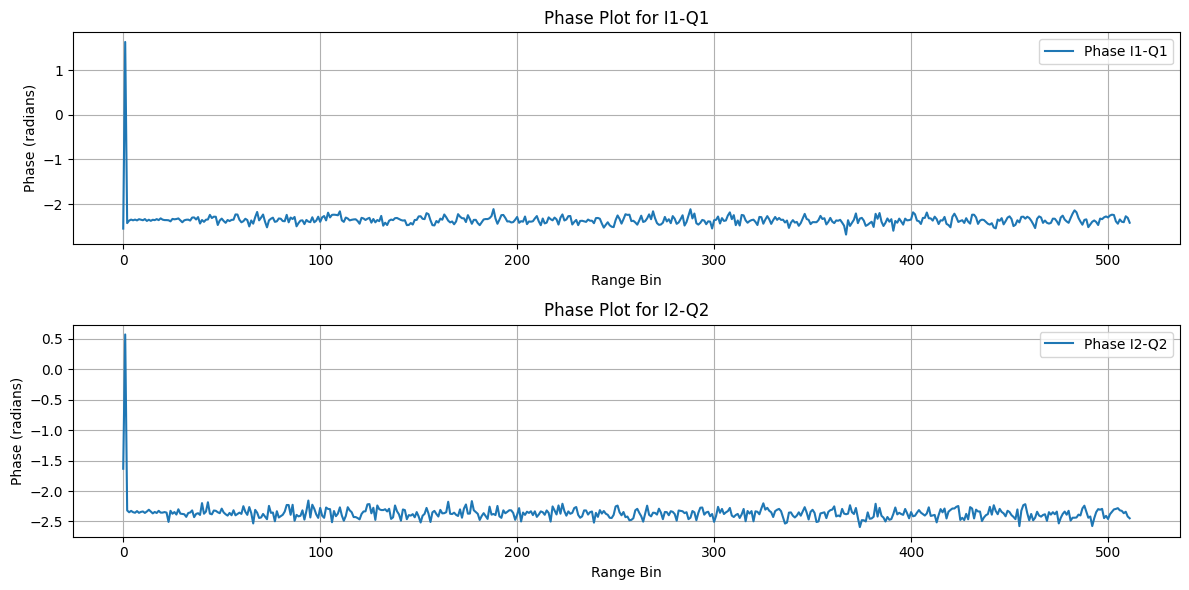

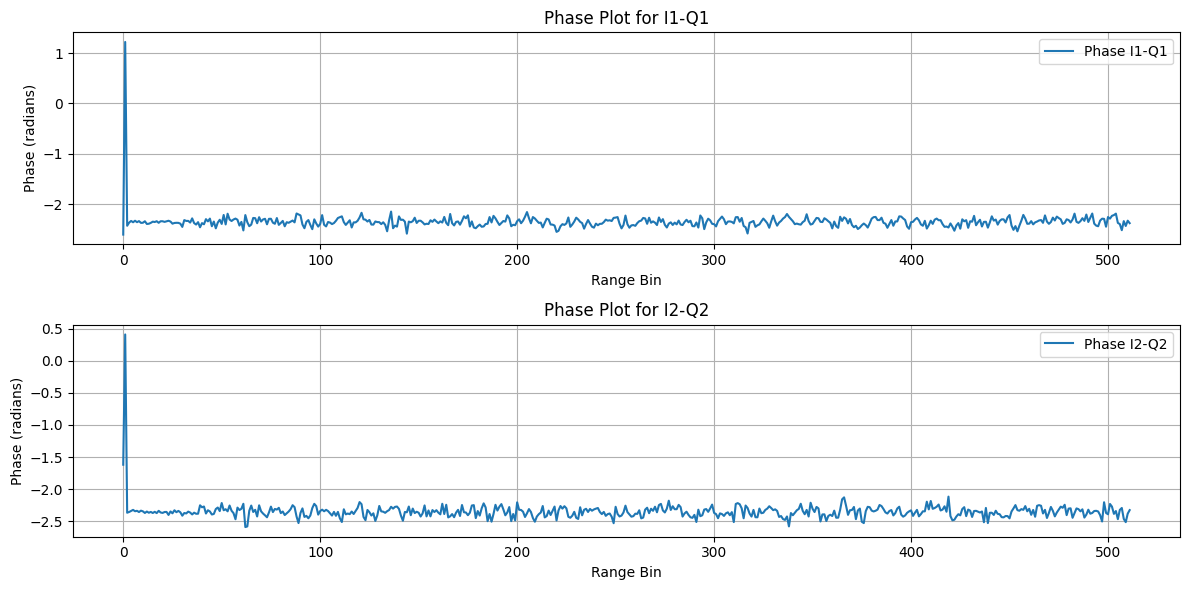

In [9]:

radial_velocity_list = []

# Radial velocity
for i, data in enumerate(data_fd):
    if i > 2:
        continue
    I1 = data[0]
    Q1 = data[1]
    I2 = data[2]
    Q2 = data[3]
    
    complex_signal_1 = I1 + 1j * Q1
    complex_signal_2 = I2 + 1j * Q2
    
    phase_1 = np.angle(complex_signal_1)
    phase_2 = np.angle(complex_signal_2)
    # Apply phase unwrapping
    phase_1_unwrapped = np.unwrap(phase_1)
    phase_2_unwrapped = np.unwrap(phase_2)
    
    phase_difference = phase_1_unwrapped - phase_2_unwrapped
    
    # Plotting the phase
    plt.figure(figsize=(12, 6))

    plt.subplot(2, 1, 1)
    plt.plot(phase_1, label='Phase I1-Q1')
    plt.xlabel('Range Bin')
    plt.ylabel('Phase (radians)')
    plt.title('Phase Plot for I1-Q1')
    plt.grid(True)
    plt.legend()

    plt.subplot(2, 1, 2)
    plt.plot(phase_2, label='Phase I2-Q2')
    plt.xlabel('Range Bin')
    plt.ylabel('Phase (radians)')
    plt.title('Phase Plot for I2-Q2')
    plt.grid(True)
    plt.legend()

    plt.tight_layout()
    plt.show()

In [10]:
radial_velocity_list = []

# Radial velocity
for i, data in enumerate(data_fd):

    I1 = data[0]
    Q1 = data[1]
    I2 = data[2]
    Q2 = data[3]
    
    complex_signal_1 = I1 + 1j * Q1
    complex_signal_2 = I2 + 1j * Q2
    
    phase_1 = np.angle(complex_signal_1)
    phase_2 = np.angle(complex_signal_2)
    phase_difference = phase_2 - phase_1
    
    # Ensure the phase difference is within -pi to pi
    phase_difference = np.arctan2(np.sin(phase_difference), np.cos(phase_difference))
    
    radial_velocity = (phase_difference * 0.0123457) / (4 * np.pi * 0.007)
    radial_velocity_list.append(radial_velocity)

    # Convert to numpy array for easier plotting
radial_velocity_array = np.array(radial_velocity_list)

# Plotting
# for i in range(radial_velocity_array.shape[0]):
#     plt.plot(radial_velocity_array[i], label=f'Time interval {i+1}')

# plt.xlabel('Range Bin')
# plt.ylabel('Radial Velocity (m/s)')
# plt.title('Radial Velocity for Each Range Bin')
# # plt.legend()
# plt.grid(True)
# plt.show()
    

In [11]:

from constants import DIST_BETWEEN_ANTENNAS, SPEED_LIGHT
import numpy as np
import matplotlib.pyplot as plt

# Assuming data_fd is your data array of shape (N, 4, 512)
# Sample data for demonstration (replace with your actual data)
# data_fd = np.random.randn(N, 4, 512)

# Constants
wavelength = 12.13734648  # in meters (for 24.3 GHz)
time_interval = 0.007*0.98304  # in seconds
fc = (radar_params.minFreq*(10**6)) + (radar_params.manualBW / 2)*(10**6) # Central frequency in Hz - Conversion from Mhz to Hz

max_bin = 10

# Initialize a list to hold radial velocity data
radial_velocity_list = []
view_angle_deg = []

for i, data in enumerate(data_fd):
    I1 = data[0]
    Q1 = data[1]
    I2 = data[2]
    Q2 = data[3]
    
    complex_signal_1 = I1 + 1j * Q1
    complex_signal_2 = I2 + 1j * Q2
    
    phase_1 = np.angle(complex_signal_1)
    phase_2 = np.angle(complex_signal_2)
    phase_difference = np.unwrap([phase_1, phase_2], axis=0)[1] - np.unwrap([phase_1, phase_2], axis=0)[0]
    
    # Ensure the phase difference is within -pi to pi
    phase_difference = np.arctan2(np.sin(phase_difference), np.cos(phase_difference))
    
    radial_velocity = (phase_difference * wavelength) / (4 * np.pi * time_interval)
    radial_velocity_list.append(radial_velocity[0:max_bin])
    
    alpha = np.arcsin((phase_difference * SPEED_LIGHT) / (2 * np.pi * fc * DIST_BETWEEN_ANTENNAS))
    alpha_degrees = np.degrees(alpha)  # Convert from radians to degrees
    view_angle_deg.append(alpha_degrees[0:max_bin])

# Convert to numpy array for easier plotting
radial_velocity_array = np.array(radial_velocity_list)


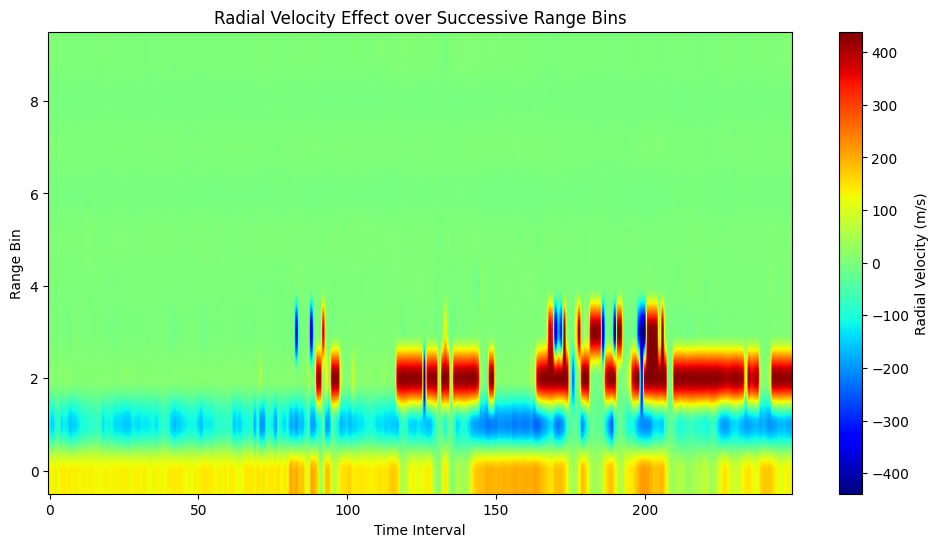

In [12]:
# Plotting
plt.figure(figsize=(12, 6))
plt.imshow(radial_velocity_array.T, aspect='auto', cmap='jet', origin='lower') # , vmin=-1, vmax=1
plt.colorbar(label='Radial Velocity (m/s)')
plt.xlabel('Time Interval')
plt.ylabel('Range Bin')
plt.title('Radial Velocity Effect over Successive Range Bins')
plt.show()

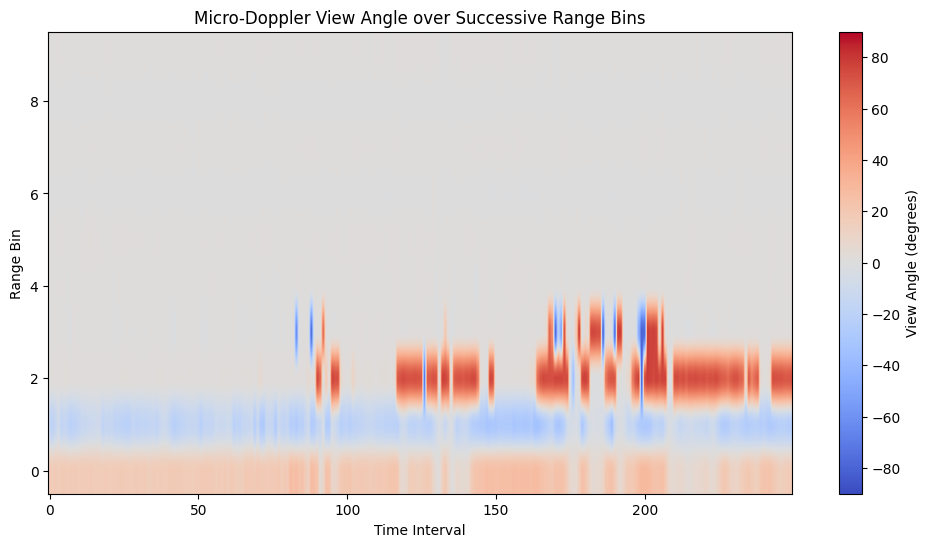

In [13]:
view_angle_deg = np.array(view_angle_deg)

plt.figure(figsize=(12, 6))
# The 'extent' parameter may need to be adjusted based on your specific data dimensions and axis labels.
im = plt.imshow(view_angle_deg.T, aspect='auto', cmap='coolwarm', origin='lower', vmin=-90, vmax=90)
plt.colorbar(im, label='View Angle (degrees)')
plt.xlabel('Time Interval')
plt.ylabel('Range Bin')
plt.title('Micro-Doppler View Angle over Successive Range Bins')
plt.show()